In [39]:
#Membersihkan data
#library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from termcolor import colored as cl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import shap

In [40]:
data = pd.read_excel('Data kasus churn UAS Analitika Data 2024.xlsx')
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Data Cleaning
#mengecek info dari data dan jenis data
data.info()
#Menangani missing value
data.isnull().sum()
#diketahui tidak ada data yang null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

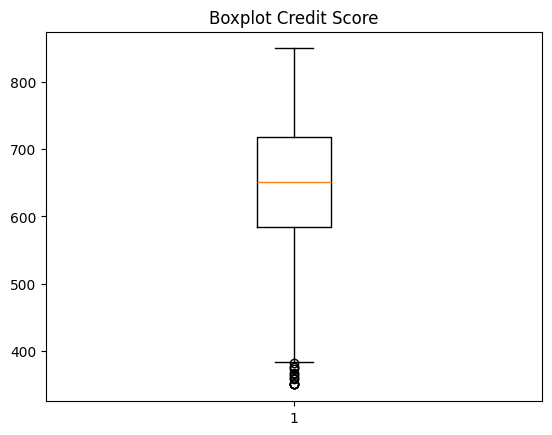

382
350


In [5]:
#memvisualisasikan outlier credit score
plt.boxplot(data['CreditScore'])
plt.title("Boxplot Credit Score")
plt.show()

Q1 = data['CreditScore'].quantile(0.25)
Q3 = data['CreditScore'].quantile(0.75)
IQR = Q3-Q1

outliers_credit_score = data[(data['CreditScore']<(Q1 -1.5*IQR))|(data['CreditScore']>(Q3+1.5*IQR))]
print(max(outliers_credit_score['CreditScore']))
print(min(outliers_credit_score['CreditScore']))

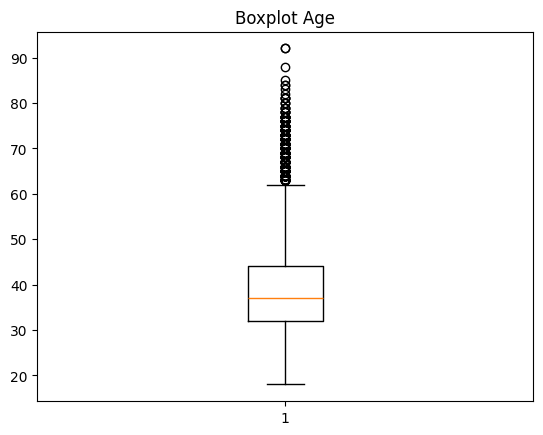

92
63


In [37]:
#memvisualisasikan outlier age
plt.boxplot(data['Age'])
plt.title("Boxplot Age")
plt.show()

Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3-Q1

outliers_age = data[(data['Age']<(Q1 -1.5*IQR))|(data['Age']>(Q3+1.5*IQR))]
print(max(outliers_age['Age']))
print(min(outliers_age['Age']))

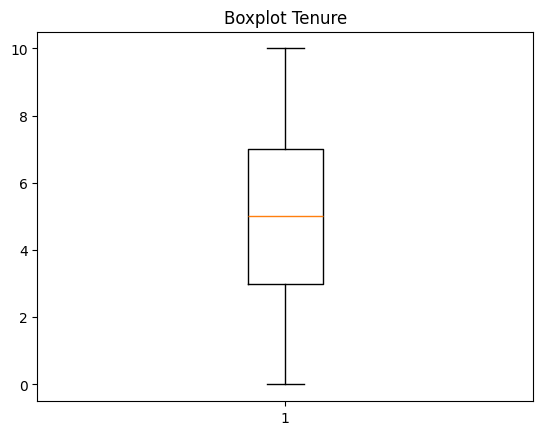

In [25]:
#memvisualisasikan outlier tenure
plt.boxplot(data['Tenure'])
plt.title("Boxplot Tenure")
plt.show()

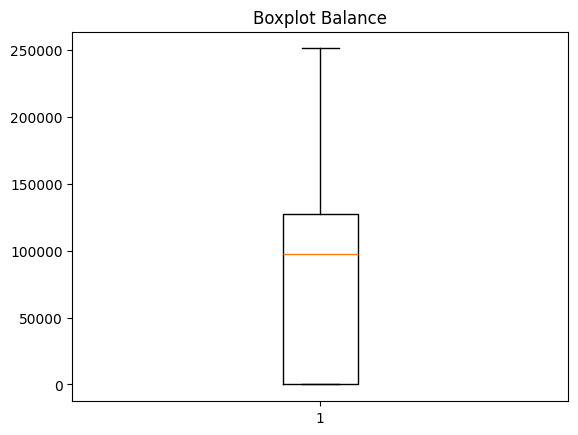

In [26]:
#memvisualisasikan outlier balance
plt.boxplot(data['Balance'])
plt.title("Boxplot Balance")
plt.show()

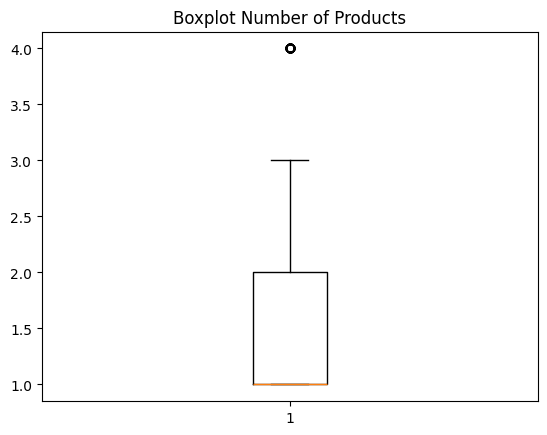

4
4


In [27]:
#memvisualisasikan outlier NumofProducts
plt.boxplot(data['NumOfProducts'])
plt.title("Boxplot Number of Products")
plt.show()
Q1 = data['NumOfProducts'].quantile(0.25)
Q3 = data['NumOfProducts'].quantile(0.75)
IQR = Q3-Q1

outliers_numofproducts = data[(data['NumOfProducts']<(Q1 -1.5*IQR))|(data['NumOfProducts']>(Q3+1.5*IQR))]
print(max(outliers_numofproducts['NumOfProducts']))
print(min(outliers_numofproducts['NumOfProducts']))

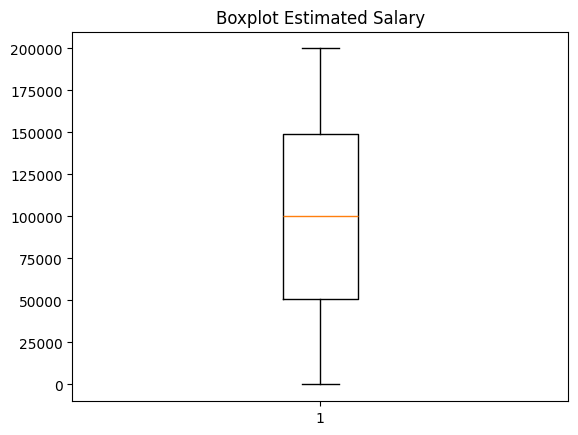

In [28]:
#memvisualisasikan outlier EstimatedSalary
plt.boxplot(data['EstimatedSalary'])
plt.title("Boxplot Estimated Salary")
plt.show()

In [39]:
#Memeriksa duplikat
data_duplikat = data.duplicated()
print(data_duplikat)
#tidak ditemukan data yang duplikat

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


In [4]:
#Data Transformasi
#drop kolom yang tidak penting
data = data.drop(columns=['RowNumber','CustomerId','Surname'])
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
#cari tahu kolom numerik dan kategorikal
kolom_numerik = data.select_dtypes(include=['float64', 'int64']).columns
kolom_kategorikal = data.select_dtypes(include=['object']).columns
print('kolom numeriknya adalah: ', list(kolom_numerik)) 
print('Kolom kategorikalnya adalah', list(kolom_kategorikal))

kolom numeriknya adalah:  ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Kolom kategorikalnya adalah ['Geography', 'Gender']


In [42]:
#One-Hot Encoding Geography
#Mencari tahu kategori pada Geography
#Memisahkan kolom
data['Geography'] = data['Geography'].astype(str)
data['Gender'] = data['Gender'].astype(str)
data = pd.get_dummies(data, columns=['Geography','Gender'])
print(data.head(5))

   RowNumber  CustomerId   Surname  CreditScore  Age  Tenure    Balance  \
0          1    15634602  Hargrave          619   42       2       0.00   
1          2    15647311      Hill          608   41       1   83807.86   
2          3    15619304      Onio          502   42       8  159660.80   
3          4    15701354      Boni          699   39       1       0.00   
4          5    15737888  Mitchell          850   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1       True            True        101348.88    True   
1              1      False            True        112542.58   False   
2              3       True           False        113931.57    True   
3              2      False           False         93826.63   False   
4              1       True            True         79084.10   False   

   Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0              True              False    

In [41]:
#Mengubah beberapa kolom numerik menjadi bertipe data boolean
data['HasCrCard'] = data['HasCrCard'].astype(bool)
data['IsActiveMember'] = data['IsActiveMember'].astype(bool)
data['Exited'] = data['Exited'].astype(bool)
print(data.head(5))

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1       True            True   
1       1   83807.86              1      False            True   
2       8  159660.80              3       True           False   
3       1       0.00              2      False           False   
4       2  125510.82              1       True            True   

   EstimatedSalary  Exited  
0        101348.88    True  
1        112542.58   False  
2        113931.57    True  
3         93826.63   False  
4         790

In [43]:
#EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   Surname            10000 non-null  object 
 3   CreditScore        10000 non-null  int64  
 4   Age                10000 non-null  int64  
 5   Tenure             10000 non-null  int64  
 6   Balance            10000 non-null  float64
 7   NumOfProducts      10000 non-null  int64  
 8   HasCrCard          10000 non-null  bool   
 9   IsActiveMember     10000 non-null  bool   
 10  EstimatedSalary    10000 non-null  float64
 11  Exited             10000 non-null  bool   
 12  Geography_France   10000 non-null  bool   
 13  Geography_Germany  10000 non-null  bool   
 14  Geography_Spain    10000 non-null  bool   
 15  Gender_Female      10000 non-null  bool   
 16  Gender_Male        1000

In [49]:
#Statistik data numerikal
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


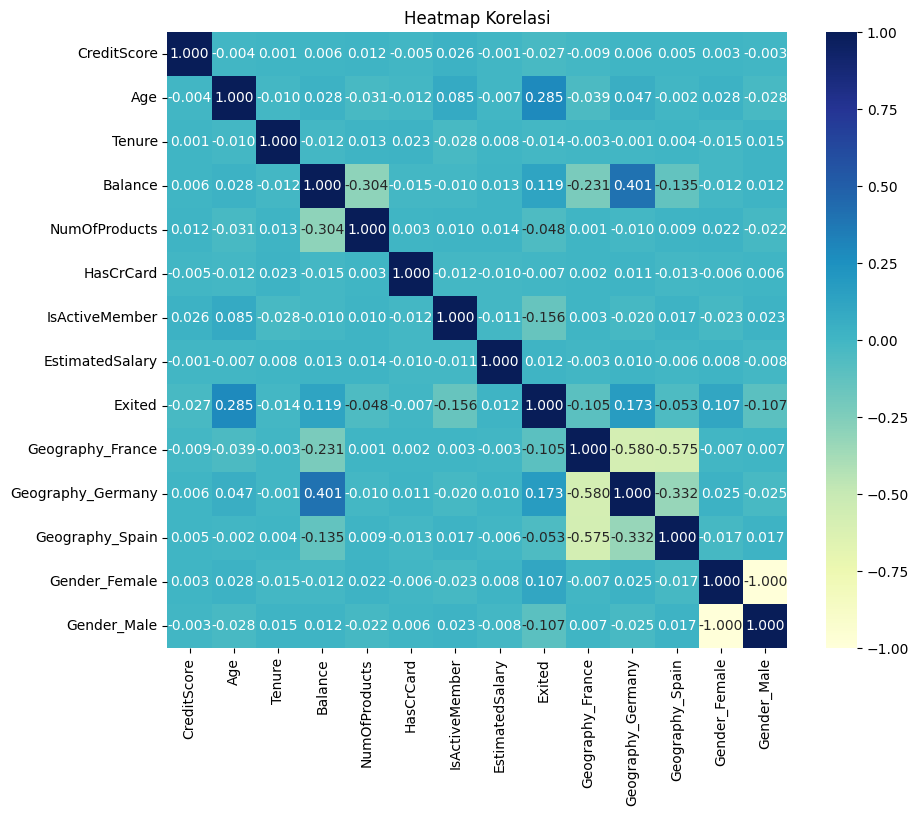

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
matriks_korelasi = data.corr()

plt.figure(figsize =(10,8))
sns.heatmap(matriks_korelasi, annot=True, cmap = 'YlGnBu', fmt='.3f')
plt.title('Heatmap Korelasi')
plt.show()

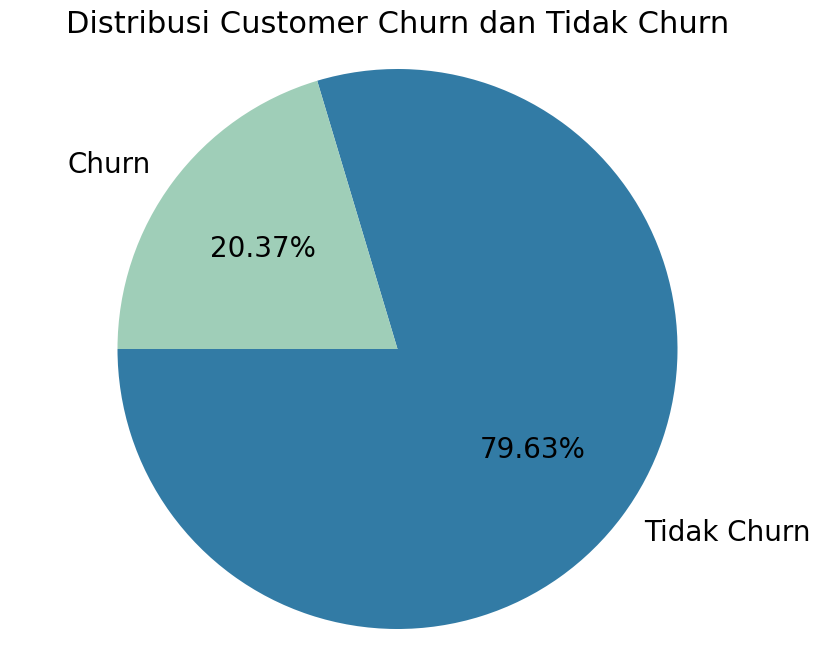

In [47]:
#Data Visualisasi
#Pie Chart Distribusi Customer Churn dan Tidak Churn
labels = ['Tidak Churn','Churn']
sizes = (data['Exited'].value_counts()).values

plt.figure(figsize =(10,8))
plt.pie(sizes, labels=labels,startangle = 180, autopct = '%1.2f%%', colors =['#327BA5','#9FCEB8'], textprops={'fontsize': 20})
plt.title('Distribusi Customer Churn dan Tidak Churn', fontsize=22)
plt.axis('equal')
plt.show()


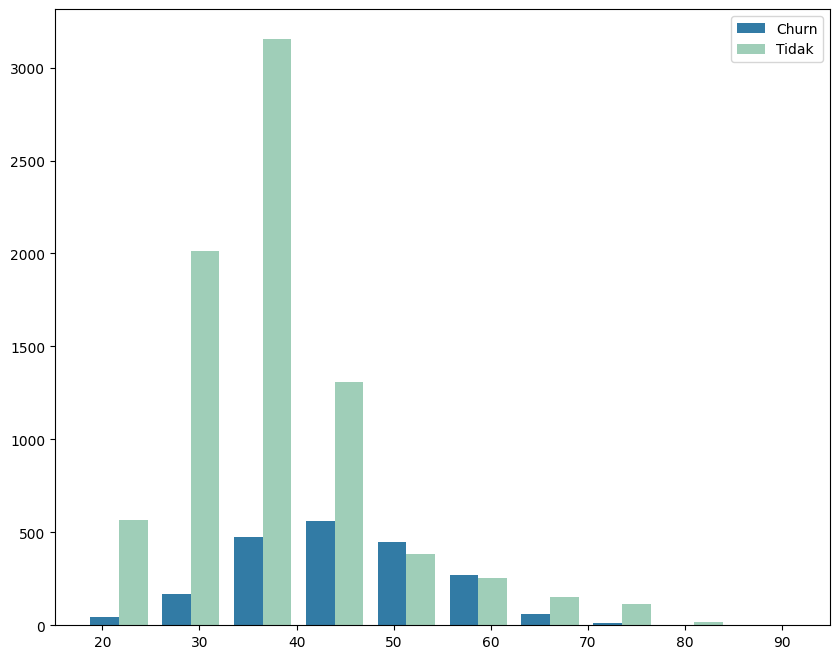

In [48]:
data_cust_churn = data[data['Exited'] == True]
data_cust_stay = data[data['Exited'] == False]

plt.figure(figsize = (10,8))
x1= data_cust_churn['Age']
x2= data_cust_stay['Age']

plt.hist([x1,x2], bins=10, color=['#327BA5','#9FCEB8'], label=['Churn','Tidak'])
plt.legend()
plt.show()

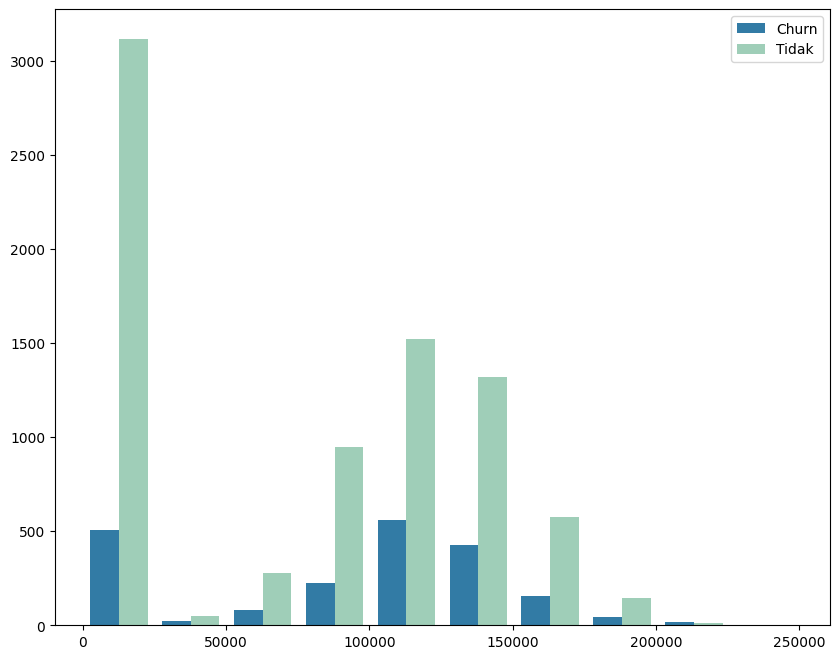

In [46]:
data_cust_churn = data[data['Exited'] == True]
data_cust_stay = data[data['Exited'] == False]

plt.figure(figsize = (10,8))
x1= data_cust_churn['Balance']
x2= data_cust_stay['Balance']

plt.hist([x1,x2], bins=10, color=['#327BA5','#9FCEB8'], label=['Churn','Tidak'])
plt.legend()
plt.show()

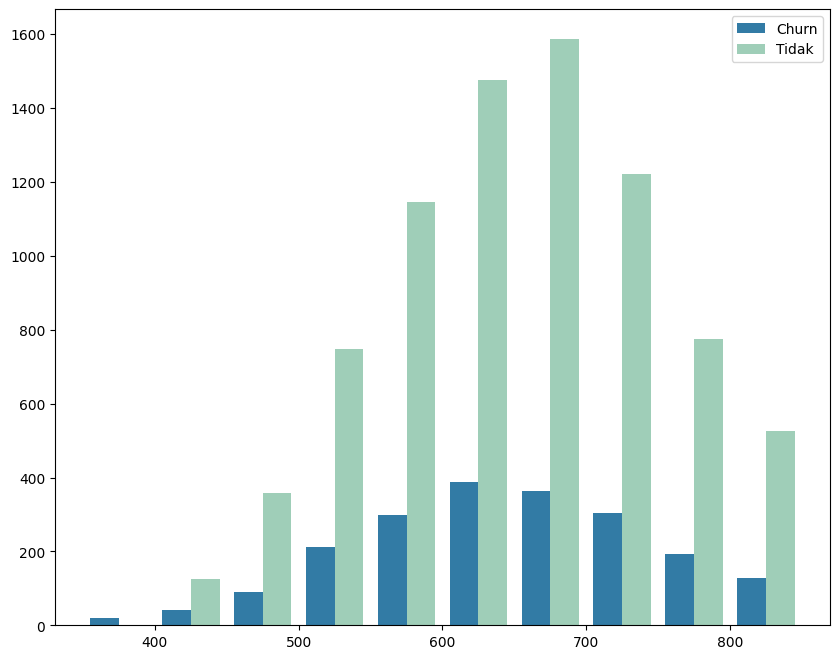

In [49]:
data_cust_churn = data[data['Exited'] == True]
data_cust_stay = data[data['Exited'] == False]

plt.figure(figsize = (10,8))
x1= data_cust_churn['CreditScore']
x2= data_cust_stay['CreditScore']

plt.hist([x1,x2], bins=10, color=['#327BA5','#9FCEB8'], label=['Churn','Tidak'])
plt.legend()
plt.show()

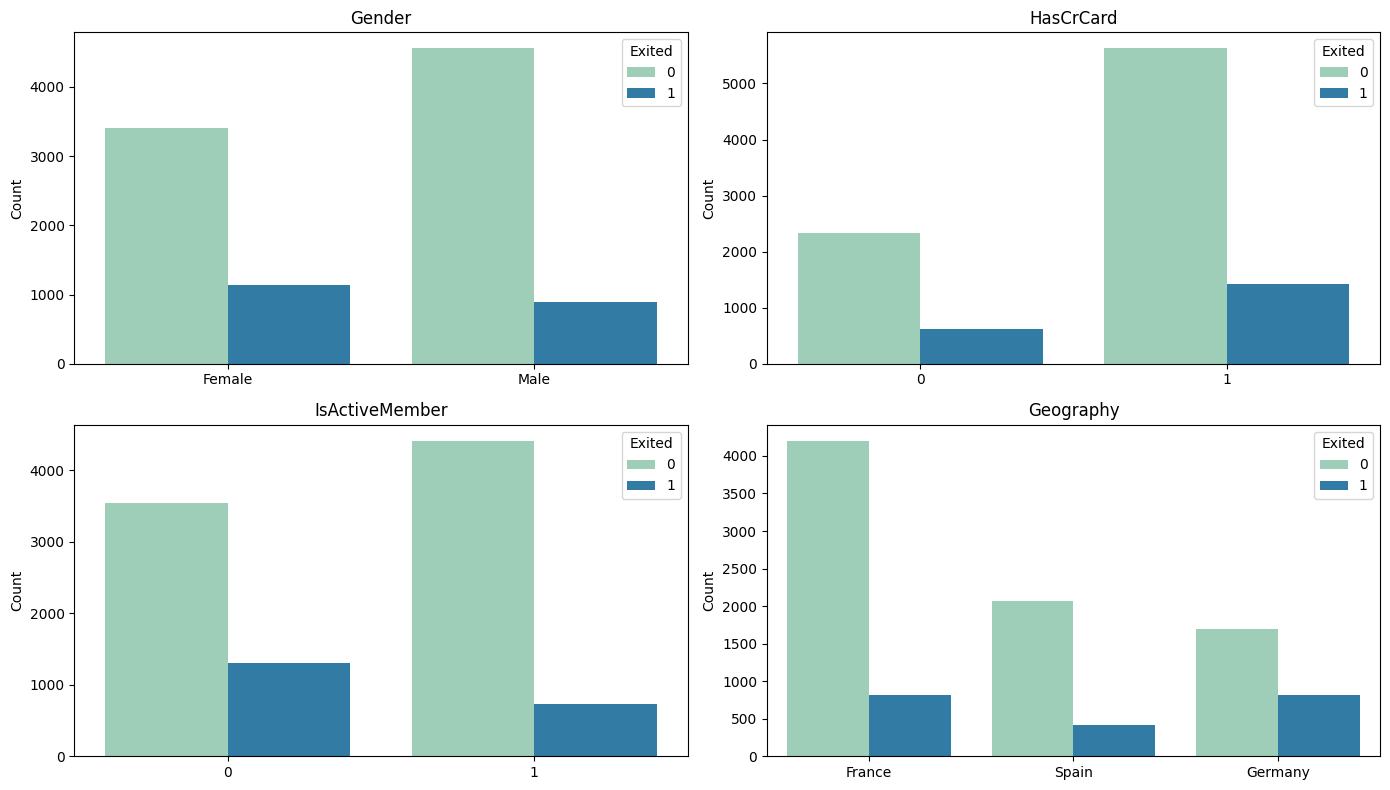

In [4]:
categories = ['Gender', 'HasCrCard', 'IsActiveMember', 'Geography']

labels = {
    'Gender': ['Female', 'Male'],
    'HasCrCard': ['No', 'Yes'],
    'IsActiveMember': ['Inactive', 'Active'],
    'Geography': ['France', 'Germany', 'Spain']
}


fig, axes = plt.subplots(2, 2, figsize=(14, 8))

for ax, category in zip(axes.flatten(), categories):
    sns.countplot(data=data, x=category, hue='Exited', ax=ax, palette='YlGnBu')
    ax.set_title(category)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.legend(title='Exited', loc='upper right')

plt.tight_layout()
plt.show()

In [118]:
#Clustering
#Normalisasi data
kolom_klaster = ['Age','Balance']
x_klaster=data[kolom_klaster]
x_klaster=np.nan_to_num(x_klaster)
sc=StandardScaler()
cluster_data = sc.fit_transform(x_klaster_train)

x_klaster_train, x_klaster_test = train_test_split(x_klaster, test_size=0.3, random_state=1)

[1 2 1 2 4 2 0 0 0 0 0 1 1 2 1 5 1 3 1 5 3 0 1 3 4 1 0 4 1 1 2 0 3 1 0 0 2
 3 2 1 2 1 4 1 1 1 5 4 1 4 3 3 1 1 0 0 2 5 1 3 0 3 1 0 1 1 3 0 2 5 1 3 1 1
 2 3 1 1 3 1 1 2 1 4 0 1 3 1 0 2 1 0 1 0 0 0 3 3 5 1]
[[3.91858736e+01 1.00720007e+05 5.31598513e-01]
 [3.85159817e+01 1.47200694e+02 5.21461187e-01]
 [3.91600000e+01 1.47056449e+05 5.41176471e-01]
 [3.88803419e+01 1.23893744e+05 5.07692308e-01]
 [3.87559809e+01 6.95934548e+04 5.88516746e-01]
 [3.96216216e+01 1.77225663e+05 5.27027027e-01]]


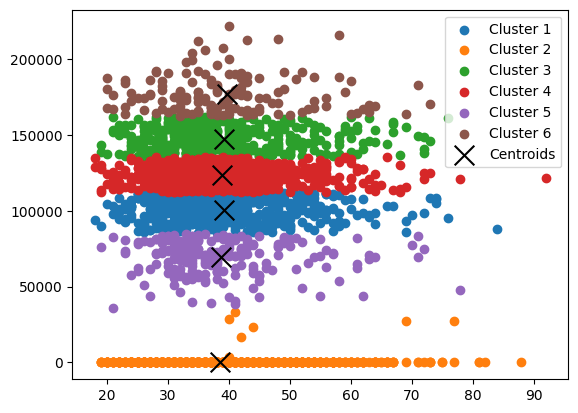

Info parameter


{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 6,
 'n_init': 100,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [120]:
#Proses pemodelan
cluster = 6
modelcl = KMeans(init='k-means++',
               n_clusters=cluster,
               n_init =100)

modelcl.fit(x_klaster_test)
labels = modelcl.labels_
print(cl(labels[:100],attrs=['bold']))

#visualisasi clustering
for i in range(cluster):
    plt.scatter(x_klaster_test[labels == i, 0], x_klaster_test[labels == i, 1], label=f'Cluster {i+1}')

centroids = modelcl.cluster_centers_
print(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='black', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend()
plt.show()


print("Info parameter")
modelcl.get_params()


In [95]:
#Mengetahui tingkat akurasi clustering
from sklearn.metrics import silhouette_score
akurasi_clustering = silhouette_score(x_klaster_test, labels)
akurasi_clustering

0.7069023250376798

In [55]:
#Model prediksi
#Dataset splitting 
#kolom_fitur = ['Age','Balance', 'IsActiveMember']
kolom_fitur = ['Age','Balance','IsActiveMember','Geography_Germany','Geography_France','Gender_Female','Gender_Male']
x = data[kolom_fitur]

#x = data.drop('Exited', axis=1)
y = data.Exited

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)


In [14]:
#Menggunakan random forest
from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
ranfor.fit(x_train,y_train)
y_predranfor = ranfor.predict(x_test)
ranfor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [13]:
#Melihat akurasi
#Akurasi model
print('Accuracy:',metrics.accuracy_score(y_test,y_predranfor))
plt.show()

Accuracy: 0.8266666666666667


Text(0.5, 1.0, 'Random Forest')

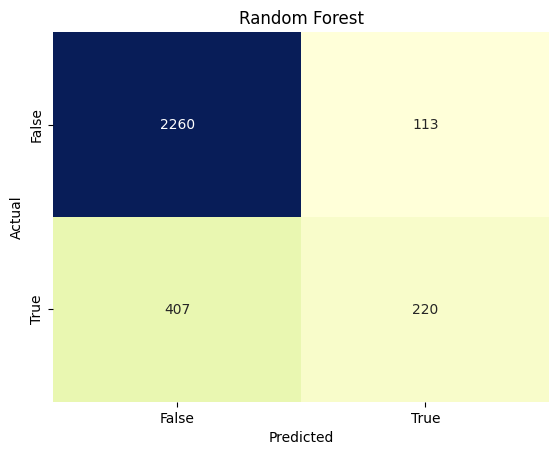

In [37]:
#Membuat confusion matrix
cmrf = pd.crosstab(y_test, y_predranfor, rownames=['Actual'], colnames =['Predicted'])
sns.heatmap(cmrf,annot=True, cmap = 'YlGnBu', fmt='d', cbar =False)
plt.title('Random Forest')

In [15]:
#Menggunakan Gradient Boosting Machine
from sklearn.ensemble import GradientBoostingClassifier

modelGBM = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate =0.1, random_state=42)
modelGBM.fit(x,y)
y_predGBM = modelGBM.predict(x_test)
modelGBM.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [61]:
#Melihat akurasi
#Akurasi model
print('Accuracy:',metrics.accuracy_score(y_test,y_predGBM))
plt.show()

Accuracy: 0.837


Text(0.5, 1.0, 'GBM')

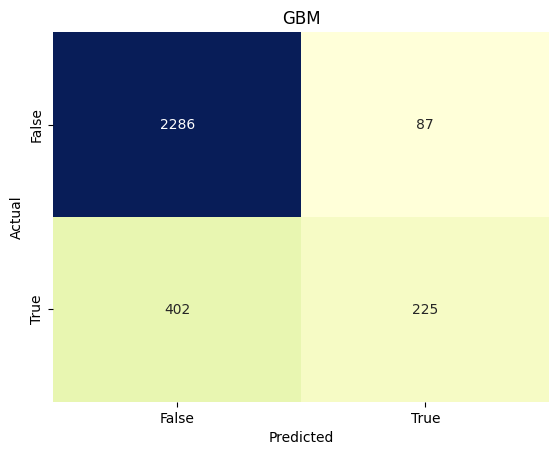

In [36]:
#Membuat confusion matrix
cmGBM = pd.crosstab(y_test, y_predGBM, rownames=['Actual'], colnames =['Predicted'])
sns.heatmap(cmGBM,annot=True, cmap = 'YlGnBu', fmt='d', cbar =False)
plt.title('GBM')

In [16]:
#Menggunakan KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

knn.fit(x_train, y_train)
y_predknn = knn.predict(x_test)
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [17]:
#Melihat akurasi
#Akurasi model
print('Accuracy:',metrics.accuracy_score(y_test,y_predknn))
plt.show()

Accuracy: 0.8173333333333334


Text(0.5, 1.0, 'KNN')

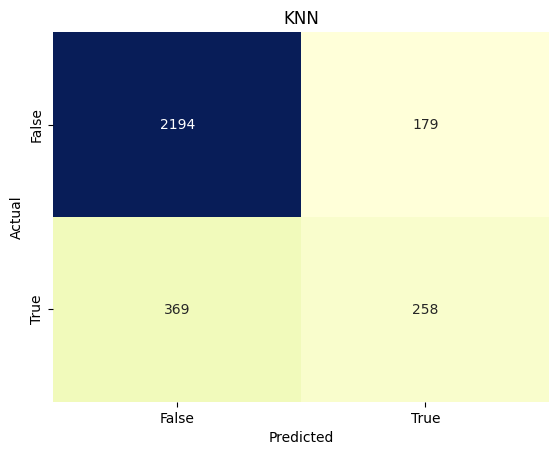

In [35]:
#Membuat confusion matrix
cmKNN = pd.crosstab(y_test, y_predknn, rownames=['Actual'], colnames =['Predicted'])
sns.heatmap(cmKNN,annot=True, cmap = 'YlGnBu', fmt='d', cbar =False)
plt.title('KNN')

In [22]:
#Menggunakan Support Vector Machine
from sklearn.svm import SVC
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

svm = SVC(kernel='rbf', C=1, gamma = 'scale', random_state=42)
svm.fit(x_train, y_train)
y_predsvm = svm.predict(x_test)
svm.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [24]:
#Melihat akurasi
#Akurasi model
print('Accuracy:',metrics.accuracy_score(y_test,y_predsvm))
plt.show()

Accuracy: 0.8326666666666667


Text(0.5, 1.0, 'SVM')

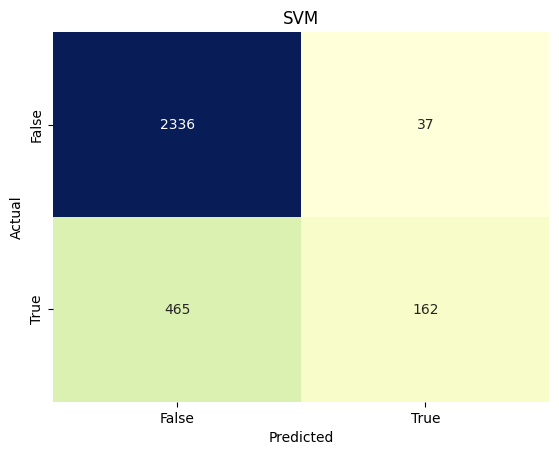

In [34]:
#Membuat confusion matrix
cmSVM = pd.crosstab(y_test, y_predsvm, rownames=['Actual'], colnames =['Predicted'])
sns.heatmap(cmSVM,annot=True, cmap = 'YlGnBu', fmt='d', cbar =False)
plt.title('SVM')